In [107]:
#importing all the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for oversampling in order to make our data balanced
from imblearn.over_sampling import SMOTE

#importing libraries necessary for building classifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold,GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from xgboost import XGBClassifier

#Importing all the performance metrics to check model's performance
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score,precision_recall_curve



Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [2]:
#Loading of the data for analysis
df=pd.read_csv("/content/health care diabetes.csv")

In [3]:
#understanding the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
y=df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
x=df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**Handling the missing values:**
 As per description coulmns with a value of zero does not make sense and thus indicates missing value. Hence we will be replacing Zero with the mean value of respective column.

In [11]:
cols=[]
cols=x.columns

In [12]:
#Details of Zeroes present in each column
for i in cols:
  #print(i)
  print("No of columns with Zero",i,"value:",(x[i]==0).sum())

No of columns with Zero Pregnancies value: 111
No of columns with Zero Glucose value: 5
No of columns with Zero BloodPressure value: 35
No of columns with Zero SkinThickness value: 227
No of columns with Zero Insulin value: 374
No of columns with Zero BMI value: 11
No of columns with Zero DiabetesPedigreeFunction value: 0
No of columns with Zero Age value: 0


In [13]:
cols_with_zero=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

Mean value for glucose is: 120.89453125


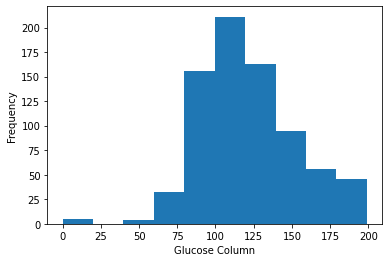

In [14]:
#Histogram for the Glucose values visualization
x["Glucose"].plot.hist()
plt.xlabel("Glucose Column")
print("Mean value for glucose is:",x["Glucose"].mean())

Mean value for BloodPressure is: 69.10546875


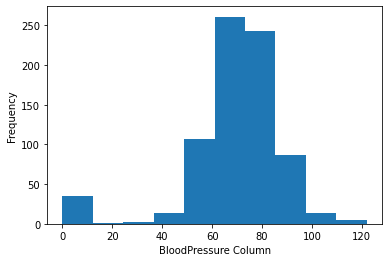

In [15]:
x["BloodPressure"].plot.hist()
plt.xlabel("BloodPressure Column")
print("Mean value for BloodPressure is:",x["BloodPressure"].mean())

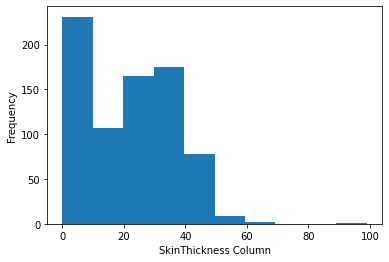

In [16]:
plt.figure(figsize=(6,4))
x["SkinThickness"].plot.hist()
plt.xlabel("SkinThickness Column")
sns.set_style(style="darkgrid")

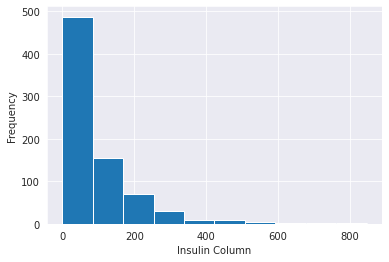

In [17]:
plt.figure(figsize=(6,4))
x["Insulin"].plot.hist()
plt.xlabel("Insulin Column")
sns.set_style(style="darkgrid")

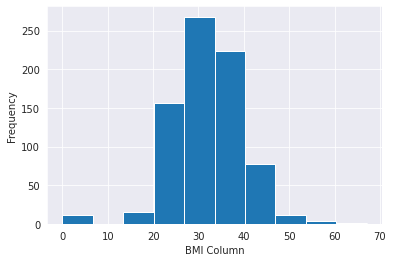

In [18]:
plt.figure(figsize=(6,4))
x["BMI"].plot.hist()
plt.xlabel("BMI Column")
sns.set_style(style="darkgrid")

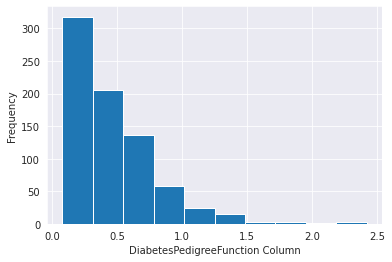

In [19]:
plt.figure(figsize=(6,4))
x["DiabetesPedigreeFunction"].plot.hist()
plt.xlabel("DiabetesPedigreeFunction Column")
sns.set_style(style="darkgrid")

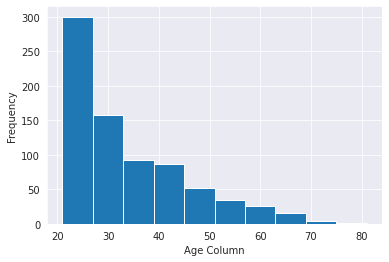

In [20]:
plt.figure(figsize=(6,4))
x["Age"].plot.hist()
plt.xlabel("Age Column")
sns.set_style(style="darkgrid")

The idea is to replace the zero values in each column with its mean value as the from the above histogram it is clear that most of the values for the variables lies around its mean except insulin. Insulin plot is a bit skewed.

In [21]:
#Replacing the zero values in glucose columns with its mean value
for i in cols:
  x[i]=x[i].replace(0,x[i].mean())

In [22]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


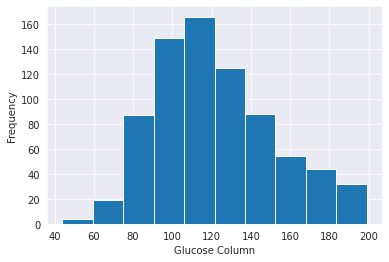

In [23]:
#Histogram for Glucose after handling of missing values
plt.figure(figsize=(6,4))
x["Glucose"].plot.hist()
plt.xlabel("Glucose Column")
sns.set_style(style="darkgrid")

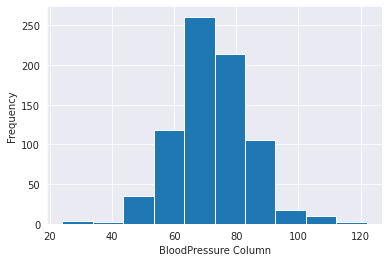

In [24]:
#Histogram for BloodPressure after handling of missing values
plt.figure(figsize=(6,4))
x["BloodPressure"].plot.hist()
plt.xlabel("BloodPressure Column")
sns.set_style(style="darkgrid")

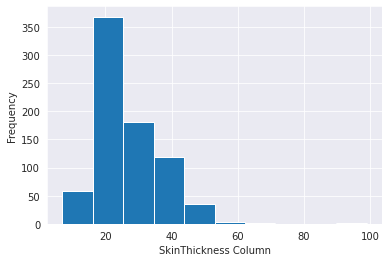

In [25]:
# Histogram for SkinThickness after handling of missing values
plt.figure(figsize=(6,4))
x["SkinThickness"].plot.hist()
plt.xlabel("SkinThickness Column")
sns.set_style(style="darkgrid")

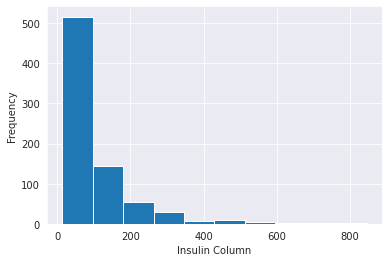

In [26]:
# Histogram for Insulin after handling of missing values
plt.figure(figsize=(6,4))
x["Insulin"].plot.hist()
plt.xlabel("Insulin Column")
sns.set_style(style="darkgrid")

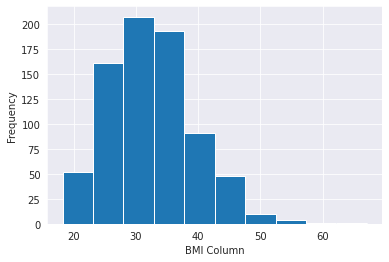

In [27]:
# Histogram for BMI after handling of missing values
plt.figure(figsize=(6,4))
x["BMI"].plot.hist()
plt.xlabel("BMI Column")
sns.set_style(style="darkgrid")

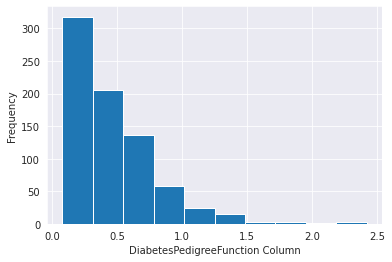

In [28]:
# Histogram for DiabetesPedigreeFunction after handling of missing values
plt.figure(figsize=(6,4))
x["DiabetesPedigreeFunction"].plot.hist()
plt.xlabel("DiabetesPedigreeFunction Column")
sns.set_style(style="darkgrid")

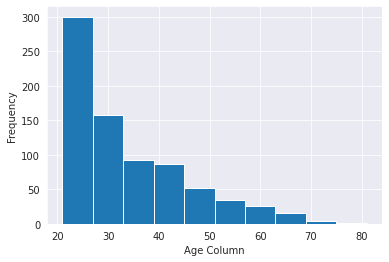

In [29]:
# Histogram for Age after handling of missing values
plt.figure(figsize=(6,4))
x["Age"].plot.hist()
plt.xlabel("Age Column")
sns.set_style(style="darkgrid")

 There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [30]:
x.dtypes.value_counts()

float64    7
int64      1
dtype: int64

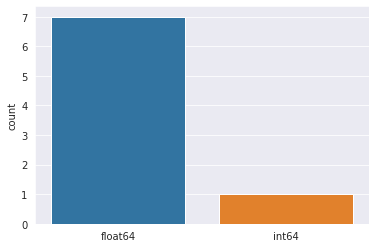

In [31]:
sns.countplot(x.dtypes)

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map

In [32]:
#Getting to know the outcome values
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

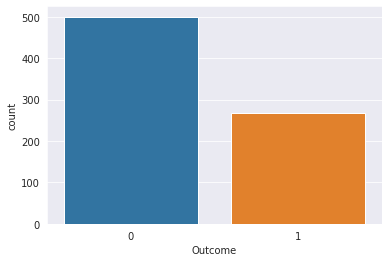

In [33]:
sns.countplot(y)

After plotting our outcome we can clearly see that data is imbalanced. Hence we will be using oversampling technique to balance the data.

In [34]:
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [35]:
X_resampled, y_resampled = SMOTE(random_state=108).fit_resample(x, y)
print(X_resampled.shape, y_resampled.shape)

(1000, 8) (1000,)


1    500
0    500
Name: Outcome, dtype: int64


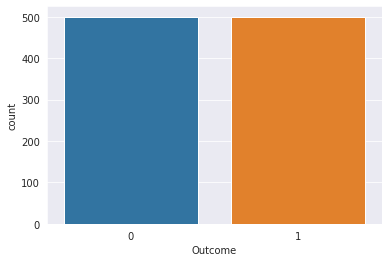

In [36]:
print(y_resampled.value_counts())
sns.countplot(y_resampled)
# we can see that now our data is balanced now. So we can move forward for further modelling part of the project

In [37]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.000000,72.000000,35.000000,79.799479,33.600000,0.627000,50,1
1,1.000000,85.000000,66.000000,29.000000,79.799479,26.600000,0.351000,31,0
2,8.000000,183.000000,64.000000,20.536458,79.799479,23.300000,0.672000,32,1
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,3.845052,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3.249021,164.686765,74.249021,20.536458,79.799479,42.767110,0.726091,29,1
996,2.299534,144.889072,66.629691,27.629691,128.370309,35.375038,0.386455,33,1
997,12.167420,131.497740,69.105469,26.060422,79.799479,45.061996,0.572747,42,1
998,3.493664,105.571347,83.238205,20.536458,79.799479,27.728596,0.649204,60,1


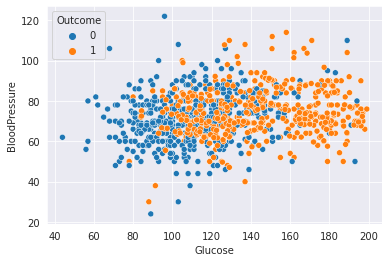

In [38]:
sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df_resampled)

Similar to above plot, we can create scatterplot for other pairs of feature also

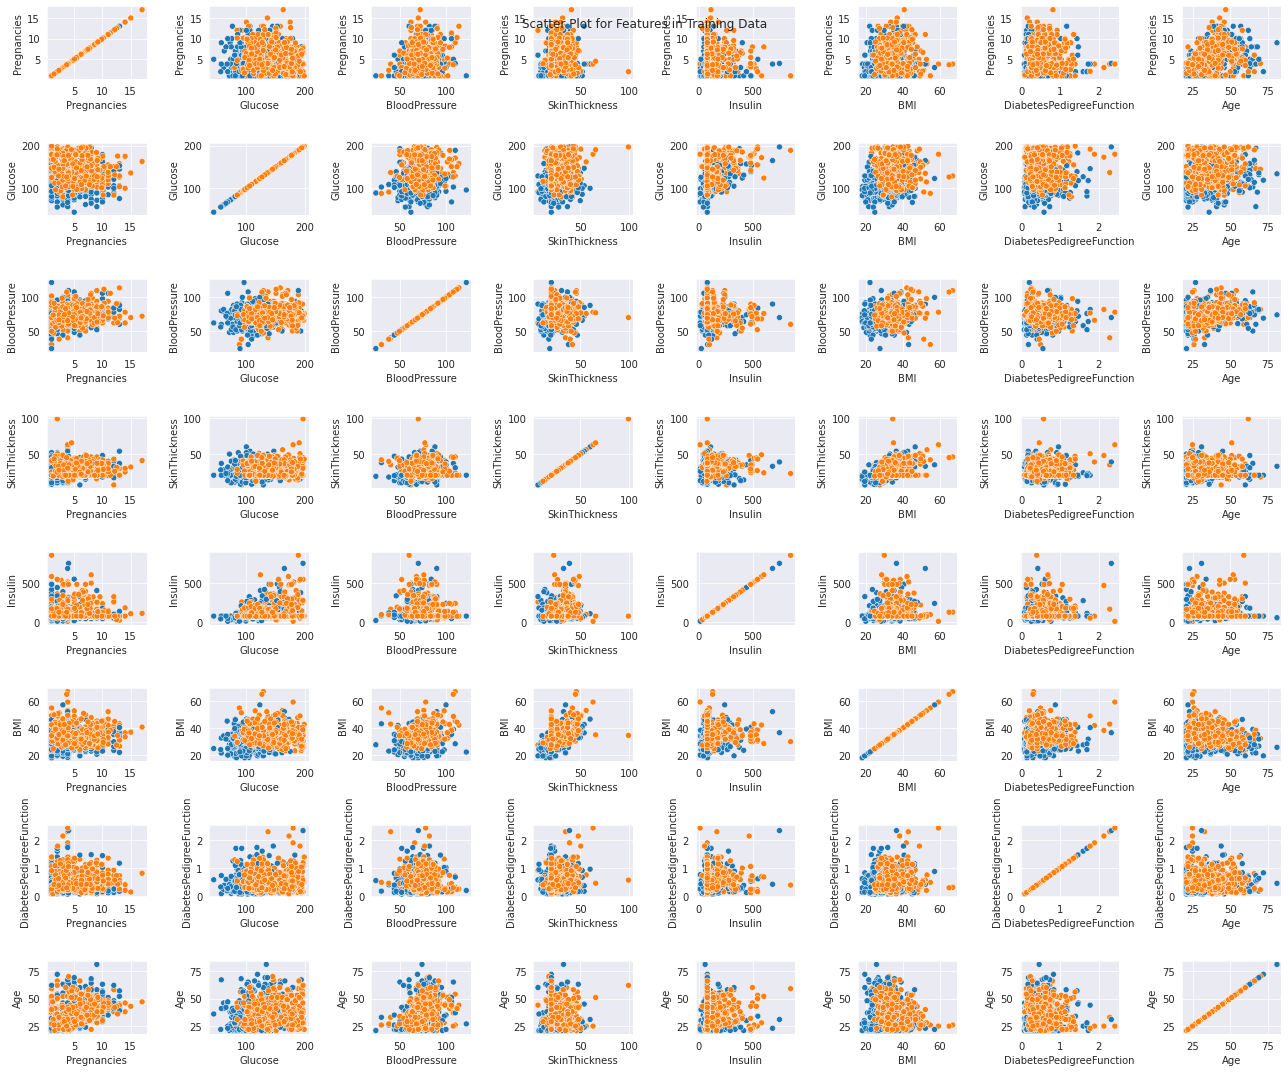

In [39]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(X_resampled.columns):
    for j, col_x in enumerate(X_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)

plt.tight_layout()

Some of the observations from above scatter plot of pairs of features are as follows:

1) Glucose alone is impressively good to distinguish between the Outcome classes.
2) Age alone is also able to distinguish between classes to some extent.
3) None of pairs in the dataset is able to clealry distinguish between the Outcome classes.

```




In [40]:
#Correlation Analysis using heatmap
X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.136967,0.246332,0.037918,-0.023566,0.086084,-0.002355,0.515906
Glucose,0.136967,1.000000,0.213302,0.146917,0.396331,0.238036,0.132868,0.241914
BloodPressure,0.246332,0.213302,1.000000,0.126194,0.009695,0.283662,-0.000103,0.340366
SkinThickness,0.037918,0.146917,0.126194,1.000000,0.274584,0.522791,0.161577,0.011435
Insulin,-0.023566,0.396331,0.009695,0.274584,1.000000,0.179095,0.145634,0.042071
BMI,0.086084,0.238036,0.283662,0.522791,0.179095,1.000000,0.163610,0.011206
DiabetesPedigreeFunction,-0.002355,0.132868,-0.000103,0.161577,0.145634,0.163610,1.000000,0.000320
Age,0.515906,0.241914,0.340366,0.011435,0.042071,0.011206,0.000320,1.000000


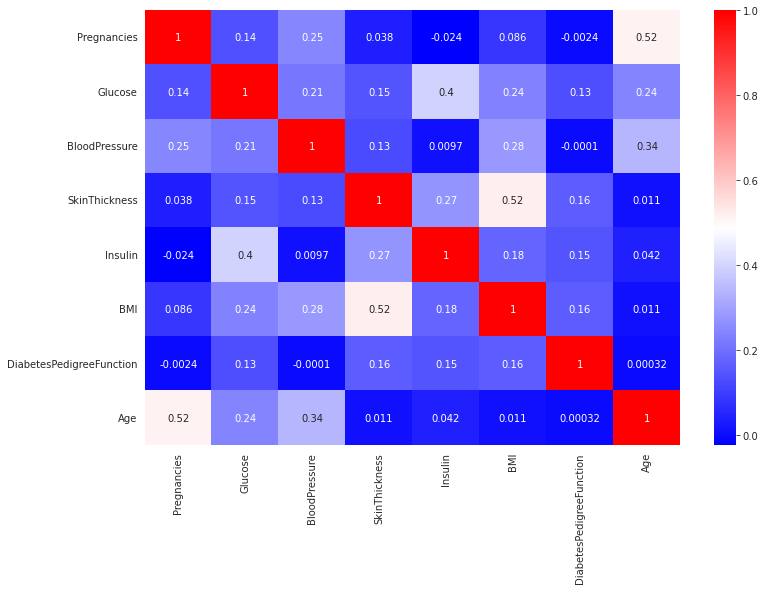

In [41]:
plt.figure(figsize=(12,8))
sns.heatmap(X_resampled.corr(), cmap='bwr', annot=True);

Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.



As stated, this is a classification problem.So, we will be building all popular classification models for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

1) Logistic Regression
2) K-Nearest Neighbour (KNN) 
3) RandomForest Classifier
4) Gradient Boosting (XGBClassifier)

We will be using GridSearchCV with Cross Validation (CV) = 5 for hyperparameter tuningof our model. It will help us to loop through predefined hyperparameters and fit model on training set and will give us optimal hyper parameters for each of the model. We will again train model with these optimized hyper parameters and then predict test data to get metrics for comparing all models.

In [125]:
#Splitting our data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state =42)

In [126]:
X_train.shape,X_test.shape

((850, 8), (150, 8))

In [127]:
#Creating lists for storing accuracy,F1 scare and auc details of various model
models = []
model_accuracy = []
model_f1 = []
model_auc = []

**1) Logistic Regression**

In [128]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.7729411764705882

In [129]:
LR.score(X_test,y_test)

0.7266666666666667

Logistic regression does not really have any critical hyperparameters to tune. However we will try to optimize one of its parameters 'C',which can be defined as Inverse of regularization strength, with the help of GridSearchCV

In [134]:
#Hypertuning using GridsearchCV
parameters = {'C':np.logspace(-4, 4, 20)}
gs_LR = GridSearchCV(LR, param_grid = parameters, cv=5, verbose=0)
gs_LR.fit(X_resampled, y_resampled)
print("Best parameter:",gs_LR.best_params_)

Best parameter: {'C': 0.03359818286283781}


In [131]:
LR_tune = LogisticRegression(C=  0.03359818286283781)
LR_tune.fit(X_train,y_train)
LR_tune.score(X_train,y_train)

0.7623529411764706

In [132]:
LR_tune.score(X_test,y_test)

0.7466666666666667

AUC: 0.797


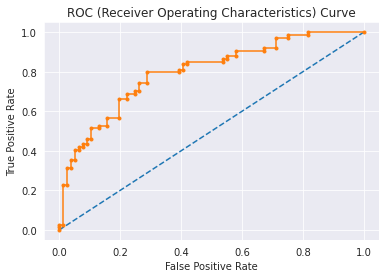

In [135]:
probs = LR_tune.predict_proba(X_test)            # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.756 auc_pr=0.785 ap=0.789


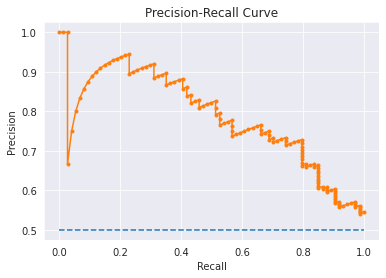

In [136]:
pred_y_test = LR_tune.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs)     # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                        # calculate F1 score
auc_lr_pr = auc(recall, precision)                                        # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                               # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                                   # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [137]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

**2) KNN (K-Nearest Neighbour)**

In [138]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN train score: ",knn.score(X_train,y_train))
print("KNN test score: ",knn.score(X_test,y_test))

KNN train score:  0.8282352941176471
KNN test score:  0.7466666666666667


In [139]:
#Hypertuning using GridsearchCV

knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

gs_knn = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(X_resampled, y_resampled)
print("Best Parameters: ",gs_knn.best_params_)
print("Best score: ",gs_knn.best_score_)

Best Parameters:  {'n_neighbors': 2}
Best score:  0.7709999999999999


In [140]:
knn_tune = KNeighborsClassifier(n_neighbors=2)
knn_tune.fit(X_train,y_train)
print("KNN train score: ",knn_tune.score(X_train,y_train))
print("KNN test score: ",knn_tune.score(X_test,y_test))

KNN train score:  0.9411764705882353
KNN test score:  0.8066666666666666


AUC: 0.826


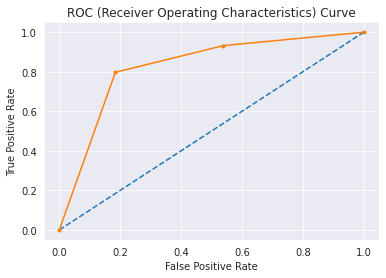

In [141]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn_tune.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.803 auc_pr=0.856 ap=0.762


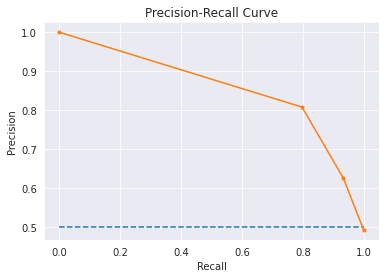

In [142]:
# Precision Recall Curve 

pred_y_test = knn_tune.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs)     # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                        # calculate F1 score
auc_knn_pr = auc(recall, precision)                                       # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                               # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                                   # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [143]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

**3) RandomForrest Classifier**



In [144]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
print("Train data score:",RF.score(X_train, y_train))
print("Test data score:",RF.score(X_test, y_test))

Train data score: 1.0
Test data score: 0.7866666666666666


In [154]:
#Hypertuning using GridsearchCV

parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,2,3,4,5]
}

In [155]:
gs_rf = GridSearchCV(estimator=RF, param_grid=parameters,cv=7, verbose=True)
gs_rf.fit(X_resampled, y_resampled)
print("Best Parameters: ",gs_rf.best_params_)
print("Best score: ",gs_rf.best_score_)

Fitting 7 folds for each of 75 candidates, totalling 525 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score:  0.8110129307312406


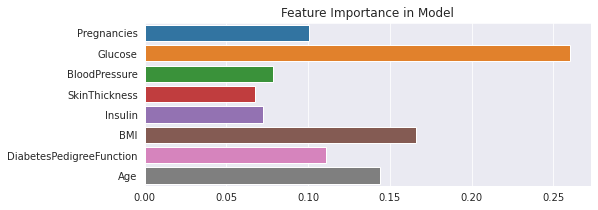

In [157]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=RF.feature_importances_);
plt.title("Feature Importance in Model");

In [158]:
RF_tune = RandomForestClassifier(n_estimators=100, min_samples_leaf= 1, max_depth= None)
RF_tune.fit(X_train, y_train)
print("Train data score:",RF_tune.score(X_train, y_train))
print("Test data score:",RF_tune.score(X_test, y_test))

Train data score: 1.0
Test data score: 0.8066666666666666


AUC: 0.866


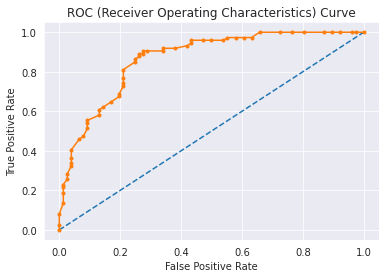

In [159]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = RF_tune.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.818 auc_pr=0.846 ap=0.842


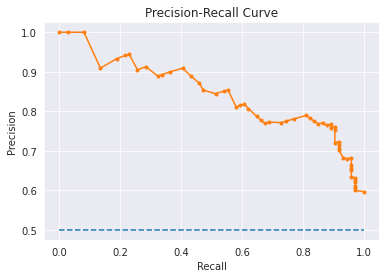

In [160]:
# Precision Recall Curve 

pred_y_test = RF_tune.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs)     # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                        # calculate F1 score
auc_rf_pr = auc(recall, precision)                                       # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                               # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                                   # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [161]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_rf)

**4) XGBoost Classifier**

In [162]:
xgb = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)
xgb.fit(X_train, y_train)
print("Train data score:",xgb.score(X_train, y_train))
print("Test data score:",xgb.score(X_test, y_test))

Train data score: 0.8941176470588236
Test data score: 0.7666666666666667


In [163]:
# Hyper parameter tuning using GridsearchCV
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [168]:
gs_xgb = GridSearchCV(xgb, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=7, verbose=0)
gs_xgb.fit(X_resampled, y_resampled)
print("Best Parameters: ",gs_xgb.best_params_)
print("Best score: ",gs_xgb.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}
Best score:  0.8818021588057297


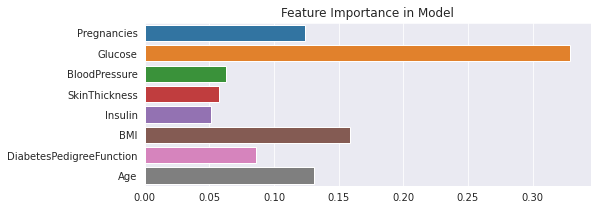

In [166]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=xgb.feature_importances_)
plt.title("Feature Importance in Model");

In [169]:
xgb_tune = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.1, max_depth= 8, n_estimators= 100)
xgb_tune.fit(X_train, y_train)
print("Train data score:",xgb_tune.score(X_train, y_train))
print("Test data score:",xgb_tune.score(X_test, y_test))

Train data score: 1.0
Test data score: 0.76


AUC: 0.838


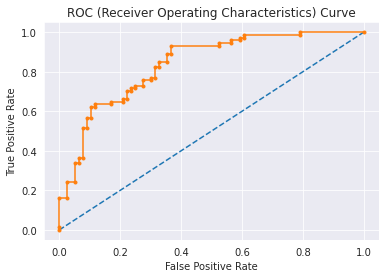

In [170]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = xgb_tune.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_xgb = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_xgb)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')        
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.778 auc_pr=0.820 ap=0.822


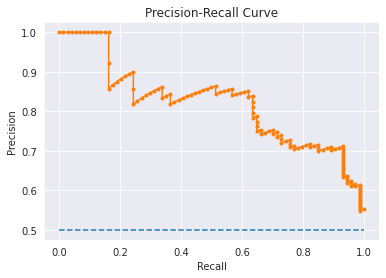

In [171]:
# Precision Recall Curve 

pred_y_test = xgb_tune.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_xgb_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_xgb_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [172]:
models.append('XGB')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_xgb)

In [173]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

In [174]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.746667,0.756410,0.796942
KNN,0.806667,0.802721,0.825658
RF,0.806667,0.817610,0.865932
XGB,0.760000,0.777778,0.837838


**On compairing the results of different model with KNN, it is very evident that Random Fprrest classifier model has comparable performance as KNN. Hence we will use it for further prediction task.**

---



Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [175]:
final_classifier=RF_tune

In [176]:
y_pred=final_classifier.predict(X_test)

In [178]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        76
           1       0.76      0.88      0.82        74

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



In [179]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[56 20]
 [ 9 65]]


In [180]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                    
Specificity = TN/(TN+FP)

In [181]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.807
Precision: 0.765
Sensitivity: 0.878
Specificity: 0.737
AUC: 0.866


By changing the threshold, target classification will be changed hence the sensitivity and specificity will also be changed. Which one of these two we should maximize,this depends on business problem. Sampe goes for precision and recall.
If we want to minimize false positive then we need higher precision model. Whereas if we want to minimize false negative then we need higher recall value.

As far as sensiotivity anf speificity considered, ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off. Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives. Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity.

Hence the threshold is set based on business problem. 